In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from pathlib import Path

# Lấy đường dẫn thư mục chứa file notebook
notebook_dir = Path(os.getcwd())  # Nếu chạy trong notebook
# notebook_dir = Path(__file__).resolve().parent  # Nếu chạy như script Python

# Đường dẫn đến file txt trong cùng thư mục
file_path = notebook_dir / 'query_execution_times.log'

# Đọc toàn bộ nội dung file
with open(file_path, 'r') as f:
    lines = f.readlines()

# Khởi tạo danh sách để lưu trữ dữ liệu thời gian
times = []

# Duyệt qua từng dòng và trích xuất thời gian thực thi
for line in lines:
    match = re.search(r"Query \d+ - Time: (\d+)", line)  # Tìm kiếm thời gian trong mỗi dòng
    if match:
        times.append(int(match.group(1)))  # Lưu thời gian vào danh sách
    else:
        times.append(0)  # Nếu không có thời gian, thêm giá trị 0

# Chuyển danh sách thành DataFrame
df = pd.DataFrame(times, columns=['Execution Time (ms)'])

# Hiển thị 5 dòng đầu tiên
df.head()


,Execution Time (ms)
0,74
1,536
2,8
3,0
4,0
...,...
94,0
95,7
96,0
97,0


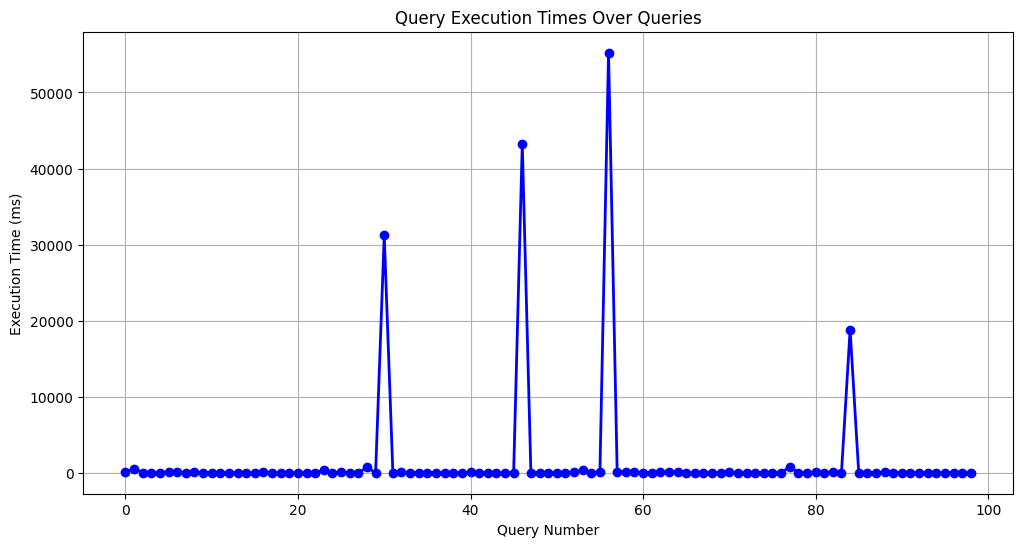

In [ ]:
# Vẽ biểu đồ đường (lưu ý các dữ liệu bằng 0 là dữ các câu truy vấn bị lỗi cú pháp do quá trình tạo dữ liệu của tpc-ds)
plt.figure(figsize=(12, 6))
plt.plot(df['Execution Time (ms)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Query Execution Times Over Queries')
plt.xlabel('Query Number')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.show()


In [ ]:
# Loại bỏ các hàng có giá trị 0 trong cột 'Execution Time (ms)'
df_cleaned = df[df['Execution Time (ms)'] > 0].reset_index(drop=True)

# Kiểm tra lại DataFrame đã được làm sạch
df_cleaned.head()


,Execution Time (ms)
0,74
1,536
2,8
3,42
4,44


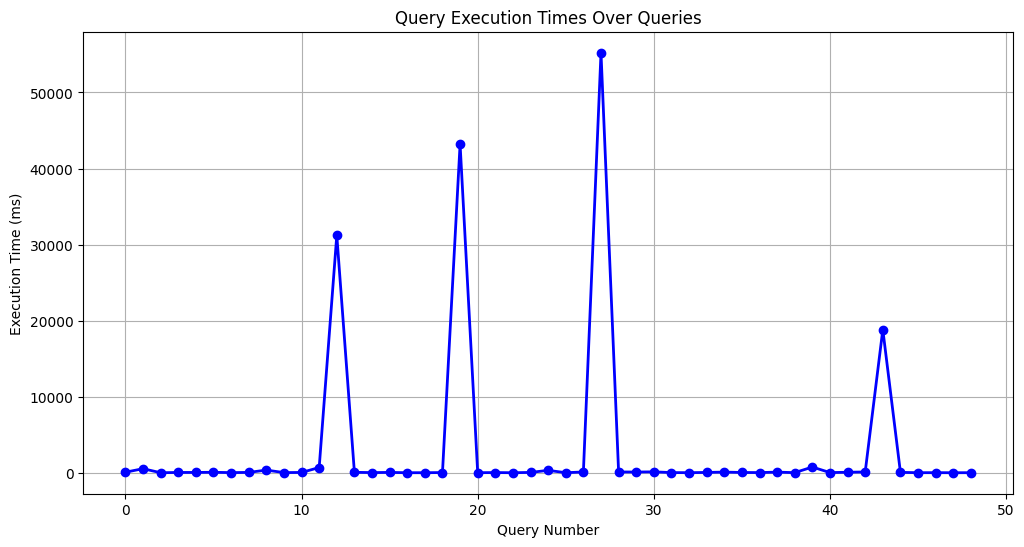

In [ ]:
# Vẽ lại biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Execution Time (ms)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Query Execution Times Over Queries')
plt.xlabel('Query Number')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.show()


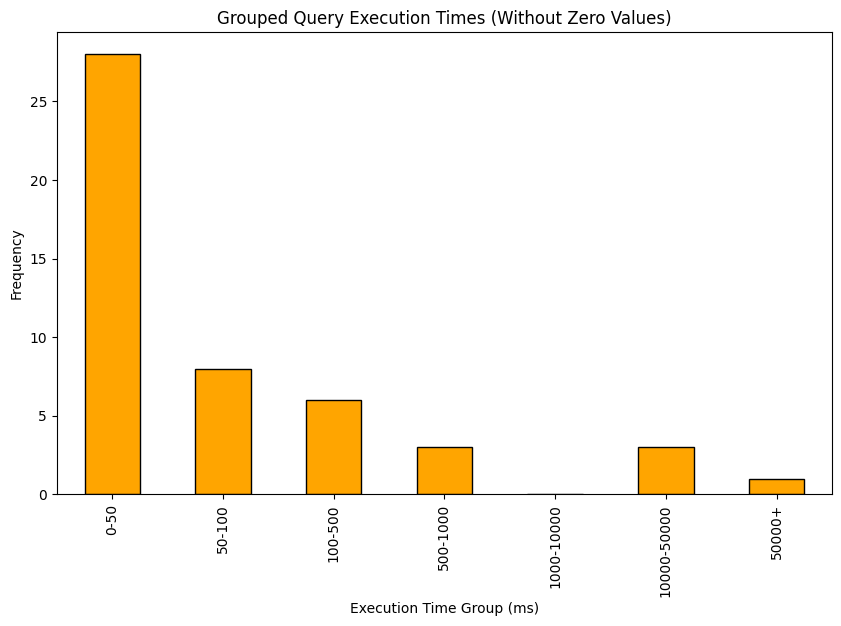

In [ ]:
# Phân nhóm các truy vấn theo thời gian thực thi
bins = [0, 50, 100, 500, 1000, 10000, 50000, 100000]
labels = ['0-50', '50-100', '100-500', '500-1000', '1000-10000', '10000-50000', '50000+']
df_cleaned['Time Group'] = pd.cut(df_cleaned['Execution Time (ms)'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ cột có nhóm
plt.figure(figsize=(10, 6))
df_cleaned['Time Group'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Grouped Query Execution Times (Without Zero Values)')
plt.xlabel('Execution Time Group (ms)')
plt.ylabel('Frequency')
plt.show()


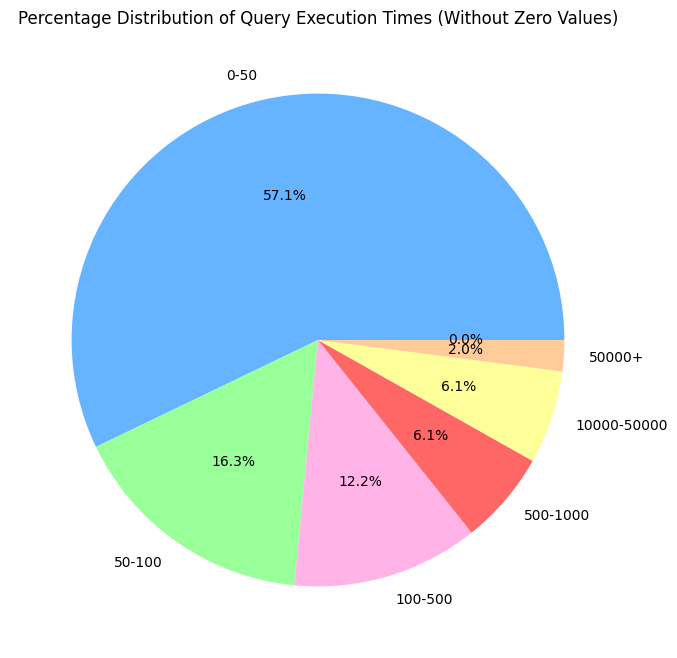

In [ ]:
# Biểu đồ tròn để thể hiện tỷ lệ các nhóm thời gian thực thi
plt.figure(figsize=(8, 8))
df_cleaned['Time Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffb3e6', '#ff6666', '#ffff99', '#ffcc99', '#c2c2f0'])
plt.title('Percentage Distribution of Query Execution Times (Without Zero Values)')
plt.ylabel('')  # Xóa nhãn trục y
plt.show()


In [ ]:
# Loại bỏ các giá trị vượt quá 10000 ms (loại bỏ 4 giá trị ngoại lệ, chỉ xem xét đến các giá trị bé)
df_cleaned_filtered = df_cleaned[df_cleaned['Execution Time (ms)'] <= 10000]

# Kiểm tra lại dữ liệu
df_cleaned_filtered.head()


,Execution Time (ms),Time Group
0,74,50-100
1,536,500-1000
2,8,0-50
3,42,0-50
4,44,0-50


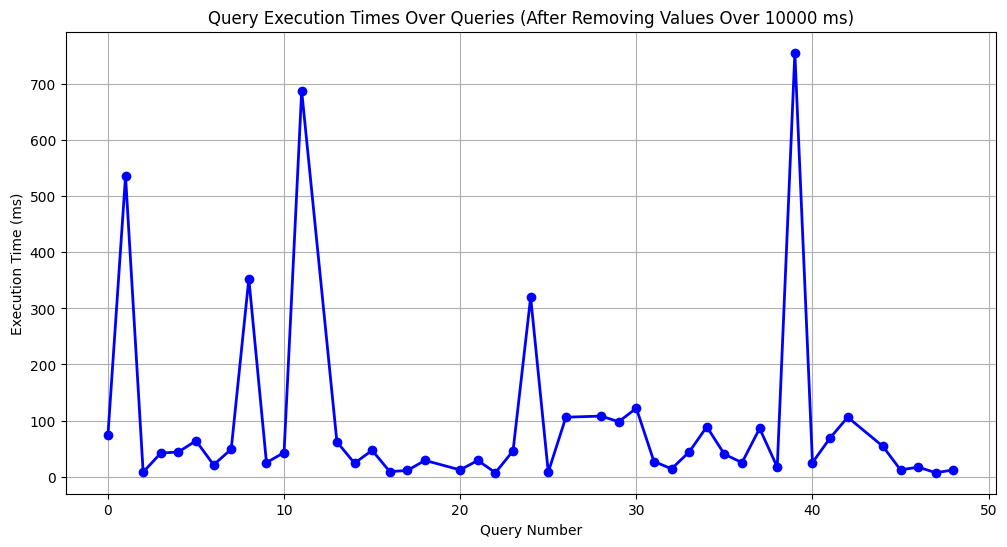

In [ ]:
# Biểu đồ đường sau khi loại bỏ giá trị > 10000 ms
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_filtered['Execution Time (ms)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Query Execution Times Over Queries (After Removing Values Over 10000 ms)')
plt.xlabel('Query Number')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.show()


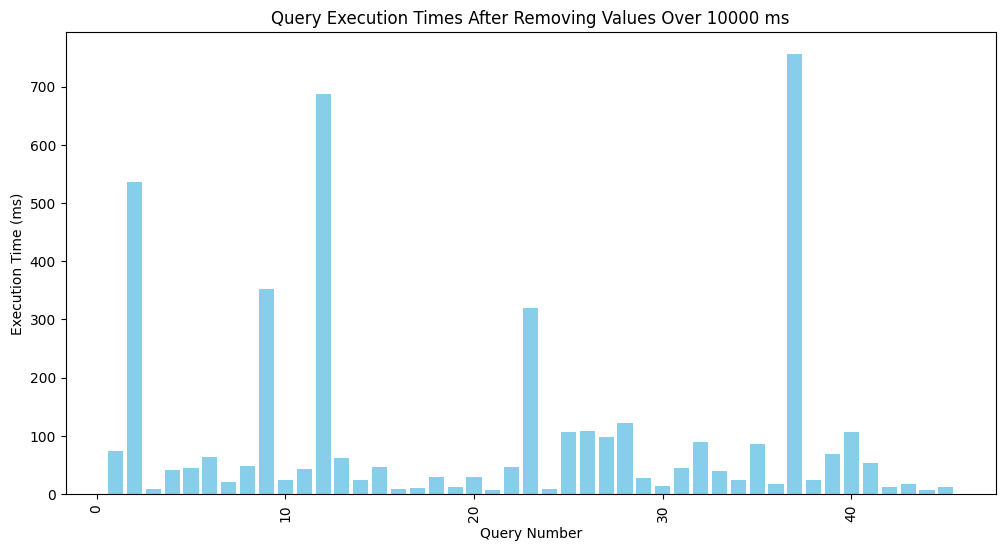

In [ ]:
# Biểu đồ cột sau khi loại bỏ giá trị > 10000 ms
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(df_cleaned_filtered) + 1), df_cleaned_filtered['Execution Time (ms)'], color='skyblue')
plt.title('Query Execution Times After Removing Values Over 10000 ms')
plt.xlabel('Query Number')
plt.ylabel('Execution Time (ms)')
plt.xticks(rotation=90)  # Quay nhãn trục x nếu cần
plt.show()


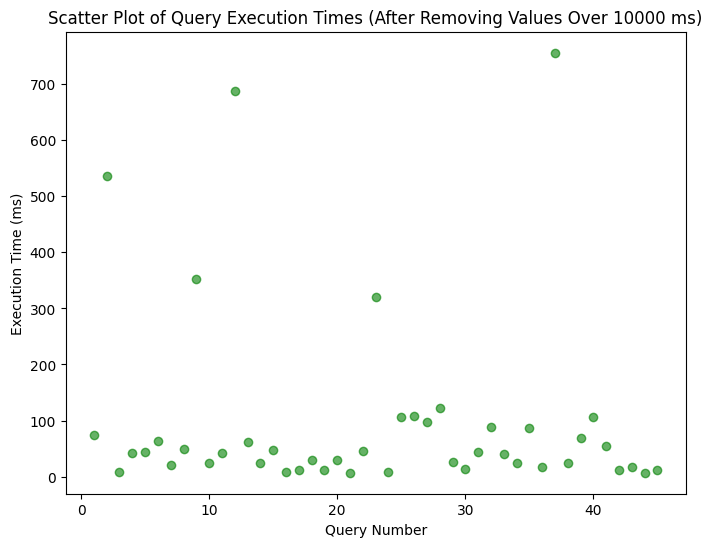

In [ ]:
# Biểu đồ tán xạ sau khi loại bỏ giá trị > 10000 ms
plt.figure(figsize=(8, 6))
plt.scatter(range(1, len(df_cleaned_filtered) + 1), df_cleaned_filtered['Execution Time (ms)'], color='g', alpha=0.6)
plt.title('Scatter Plot of Query Execution Times (After Removing Values Over 10000 ms)')
plt.xlabel('Query Number')
plt.ylabel('Execution Time (ms)')
plt.show()


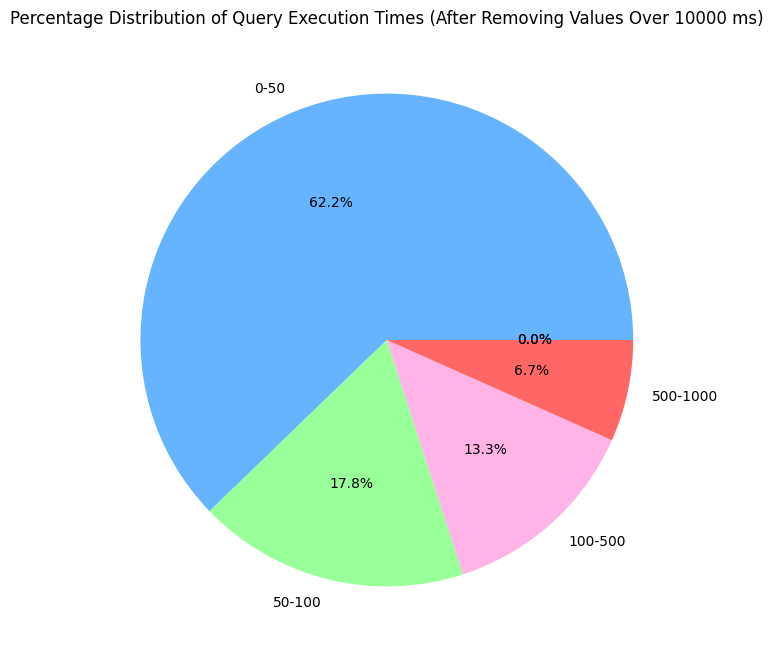

In [ ]:
# Biểu đồ tròn sau khi loại bỏ giá trị > 10000 ms
plt.figure(figsize=(8, 8))
df_cleaned_filtered['Time Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffb3e6', '#ff6666', '#ffff99', '#ffcc99'])
plt.title('Percentage Distribution of Query Execution Times (After Removing Values Over 10000 ms)')
plt.ylabel('')  # Xóa nhãn trục y
plt.show()
